In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# **DATA PREPROCESSING**

In [4]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0



Since there are no missing values in the dataset,
there is no need for mode or median imputation for any numerical variables.

In [5]:
df['Extracurricular Activities']

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


Convert "Extracurricular Activities" to binary (1 if Yes, 0 if No)

In [5]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])


In [6]:
# Mapping of original values to encoded values
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'No': 0, 'Yes': 1}


In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [16]:


# List of numerical columns to standardize
numerical_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [11]:
standard_scaler = StandardScaler()
standardized_features = standard_scaler.fit_transform(df[['Hours Studied', 'Previous Scores',
                                                           'Sleep Hours', 'Sample Question Papers Practiced']])
df_standardized = pd.DataFrame(standardized_features, columns=['Hours Studied', 'Previous Scores',
                                                               'Sleep Hours', 'Sample Question Papers Practiced'])


In [12]:
df_standardized

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.456205,-1.249754
1,-0.383481,0.723913,-1.492294,-0.900982
2,1.161410,-1.063626,0.276805,-0.900982
3,0.002742,-1.005963,-0.902594,-0.900982
4,0.775188,0.320275,0.866505,0.145333
...,...,...,...,...
9995,-1.542149,-1.178951,-1.492294,-0.900982
9996,0.775188,-0.314013,0.866505,0.145333
9997,0.388965,0.781575,0.866505,0.145333
9998,1.547633,1.588851,0.276805,-1.598526


In [13]:
label_encoder = LabelEncoder()
df_standardized['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])


In [14]:
df_standardized['Performance Index'] = df['Performance Index']

In [15]:
df_standardized

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities,Performance Index
0,0.775188,1.704176,1.456205,-1.249754,1,91.0
1,-0.383481,0.723913,-1.492294,-0.900982,0,65.0
2,1.161410,-1.063626,0.276805,-0.900982,1,45.0
3,0.002742,-1.005963,-0.902594,-0.900982,1,36.0
4,0.775188,0.320275,0.866505,0.145333,0,66.0
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,-1.492294,-0.900982,1,23.0
9996,0.775188,-0.314013,0.866505,0.145333,1,58.0
9997,0.388965,0.781575,0.866505,0.145333,1,74.0
9998,1.547633,1.588851,0.276805,-1.598526,1,95.0


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling for normalization
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [18]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1,1.0,0.111111,91.0
1,0.375,0.711864,0,0.0,0.222222,65.0
2,0.875,0.186441,1,0.6,0.222222,45.0
3,0.500,0.203390,1,0.2,0.222222,36.0
4,0.750,0.593220,0,0.8,0.555556,66.0


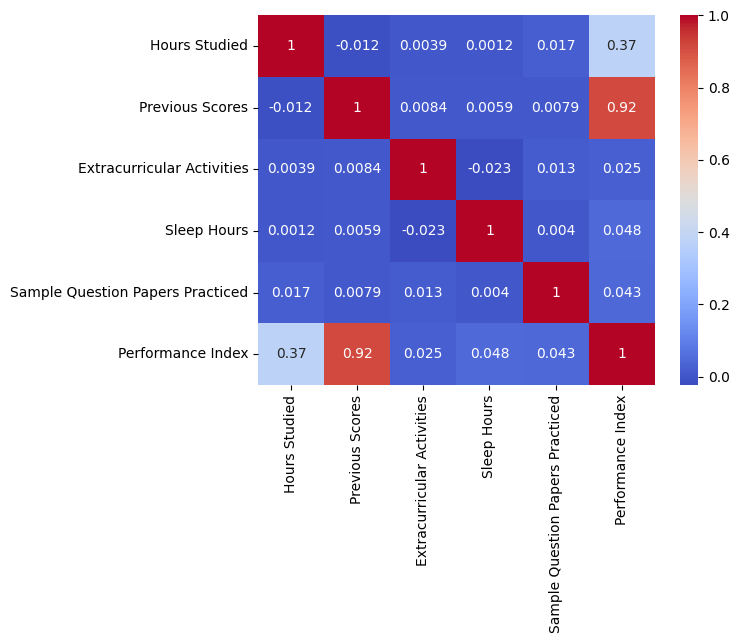

In [22]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


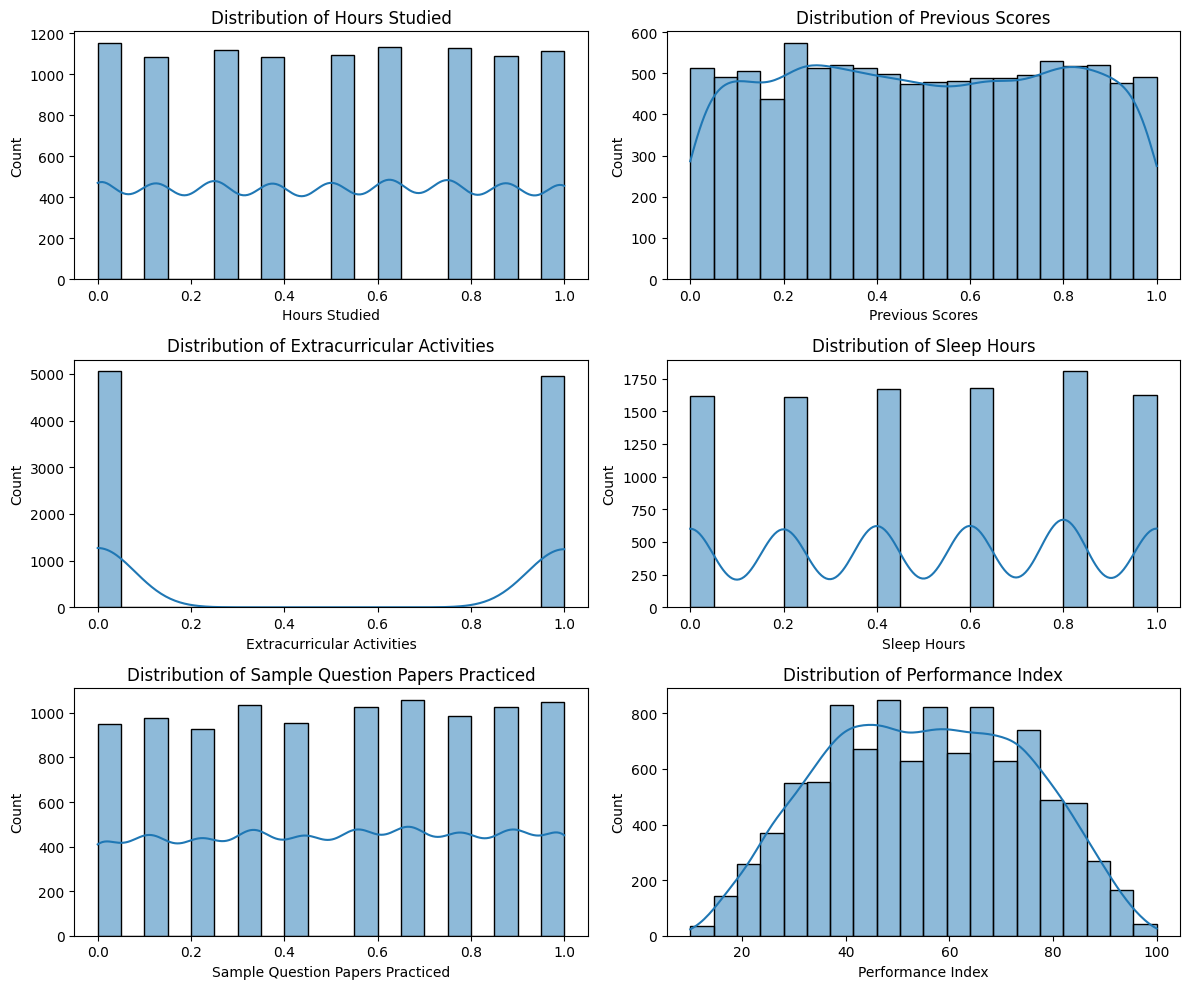

In [27]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create histograms for each numerical feature
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 2, i)  # Adjust the subplot grid as necessary
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


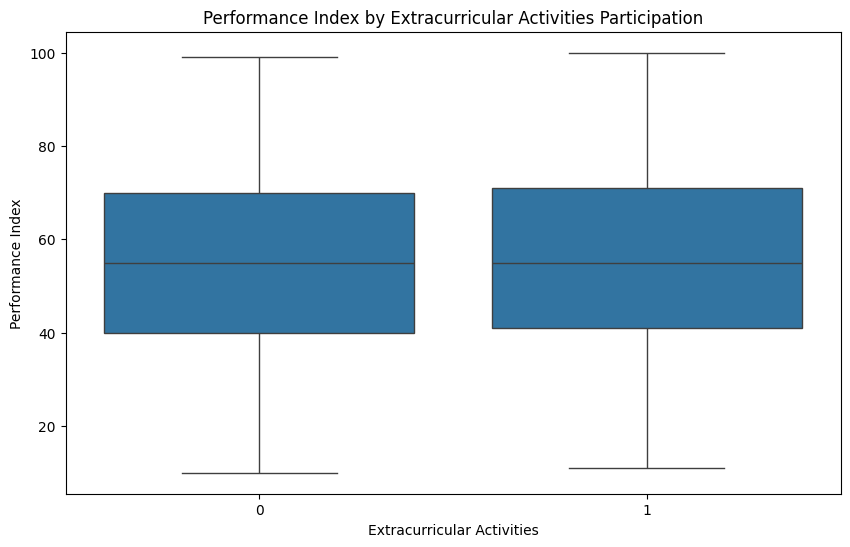

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Performance Index by Extracurricular Activities Participation')
plt.show()


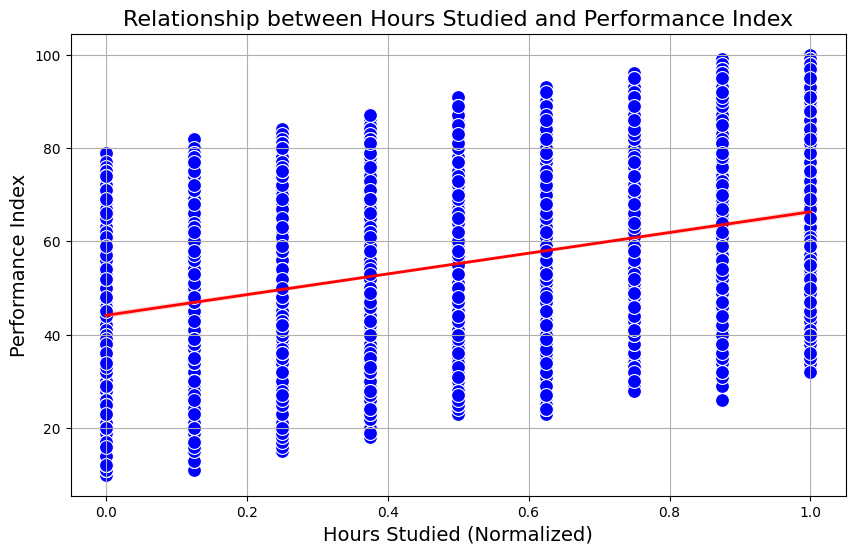

In [25]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df, color='blue', s=100)

# Adding a regression line
sns.regplot(x='Hours Studied', y='Performance Index', data=df, scatter=False, color='red', line_kws={"linewidth": 2})

# Set titles and labels
plt.title('Relationship between Hours Studied and Performance Index', fontsize=16)
plt.xlabel('Hours Studied (Normalized)', fontsize=14)
plt.ylabel('Performance Index', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

# **Model Building**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model=DecisionTreeRegressor()

In [16]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

y = df['Performance Index']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

# **Generate Predictions**

In [19]:

y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.3479166666666664


In [15]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8.737805555555555


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


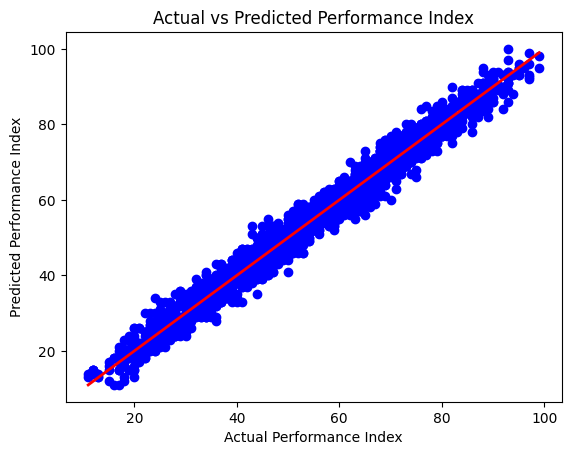

In [23]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.show()


In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Step 5: Converting the scores to positive
mae_scores = -cv_scores

# Print the MAE for each fold and the mean MAE
print(f'Mean Absolute Error for each fold: {mae_scores}')
print(f'Mean MAE across all folds: {np.mean(mae_scores)}')

Mean Absolute Error for each fold: [2.42083333 2.38491667 2.34933333 2.38525    2.34325   ]
Mean MAE across all folds: 2.3767166666666664
